In [1]:
from API_key import API_KEY
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

BASE_URL = 'https://v3.football.api-sports.io'

HEADERS = {
    'x-rapidapi-host': 'v3.football.api-sports.io',
    'x-rapidapi-key': API_KEY
}

leagues = {
    39: "England",
    140: "Spain",
    135: "Italy",
    78: "Germany",
    61: "France"
}

season = 2022 # used because it is the latest season data avaliable on the free version of the API

In [2]:
def get_standings(league_id, season):
    url = f"{BASE_URL}/standings?league={league_id}&season={season}"
    response = requests.get(url, headers=HEADERS)
    standings_data = response.json()
    return standings_data['response'][0]['league']['standings'][0]

In [4]:
def calculations (league_id, season, country):
    standings = get_standings(league_id, season)
    df = pd.DataFrame([{
        'Rank': team['rank'],
        'Team': team['team']['name'],
        'Games Played': team['all']['played'],
        'Goals For': team['all']['goals']['for']    
    } for team in standings])
    total_goals = df['Goals For'].sum()
    total_games = (df['Games Played'].sum())/2
    goalsPerGame = total_goals/total_games
    #print(f"Total Goals Scored in {country}: {total_goals}")
    #print(f"Total Games Played in {country}: {total_games}")
    print(f" Goals Scored Per Game In {country}: {goalsPerGame:.2f}")

    plt.barh(country, goalsPerGame)
    plt.xlabel('Goals Scored Per Per Game')
    plt.ylabel('Country')
    plt.title('Goals Per Match by League (2022)')

 Goals Scored Per Game In England: 2.85
 Goals Scored Per Game In Spain: 2.51
 Goals Scored Per Game In Italy: 2.56
 Goals Scored Per Game In Germany: 3.17
 Goals Scored Per Game In France: 2.81


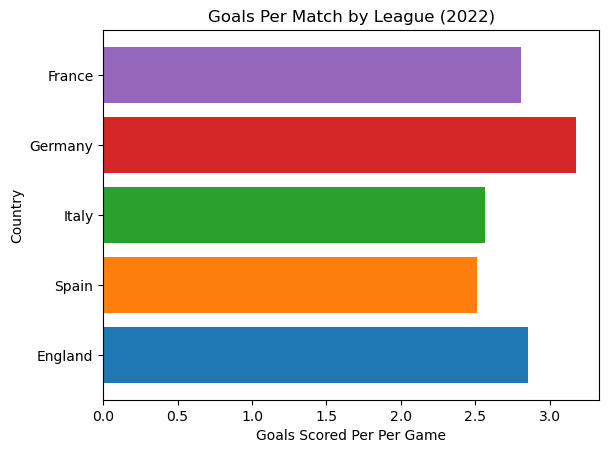

In [5]:
for league_id, country in leagues.items():
    calculations(league_id, season, country)
plt.show()

In [33]:
def get_top_red_card_data():
    all_top_red_cards = []

    for league_id, country in leagues.items():
        url = f"{BASE_URL}/players/topredcards?league={league_id}&season={season}"
        response = requests.get(url, headers=HEADERS)
        
        if response.status_code == 200:
            data = response.json().get('response', [])
            if data:
                top_red_cards = [{
                    'Player': player['player']['name'],
                    'Team': player['statistics'][0]['team']['name'],
                    'Red Cards': player['statistics'][0]['cards']['red'],
                    'League': country
                } for player in data]

                df_red_cards = pd.DataFrame(top_red_cards).set_index('Player')
                all_top_red_cards.append(df_red_cards)

    return pd.concat(all_top_red_cards) if all_top_red_cards else pd.DataFrame()

final_df = get_top_red_card_data()
print(final_df)

                             Team  Red Cards   League
Player                                               
Casemiro        Manchester United          2  England
Nélson Semedo              Wolves          1  England
Douglas Luiz          Aston Villa          1  England
A. Doucouré               Everton          1  England
T. Mitchell        Crystal Palace          1  England
...                           ...        ...      ...
E. Wahi               Montpellier          1   France
A. Djiku               Strasbourg          1   France
K. Danso                     Lens          1   France
M. Wieteska         Clermont Foot          1   France
S. Abdul Samed               Lens          1   France

[100 rows x 3 columns]


In [34]:
print(final_df['Red Cards'].sum())
final_df.groupby('League').sum()

115


,Team,Red Cards
League,,
England,Manchester UnitedWolvesAston VillaEvertonCryst...,17
France,ReimsMontpellierAuxerreParis Saint GermainEsta...,25
Germany,Bayer LeverkusenBorussia MönchengladbachBayer ...,20
Italy,SassuoloEmpoliBolognaEmpoliMonzaAtalantaUdines...,20
Spain,SevillaReal BetisCadizReal BetisRayo Vallecano...,33
